# Tasks:

### 1) Load data from Binance: https://www.binance.com/en/landing/data:

![Load klines](attachment/load_klines.png)

### 2) Calculate and plot indicators:

1. Moving average (MA)
2. Smoothed moving average (SMA)
3. Relative strength index (RSI)
3. Others (long short ratio, open interest, spot-futures spread...)

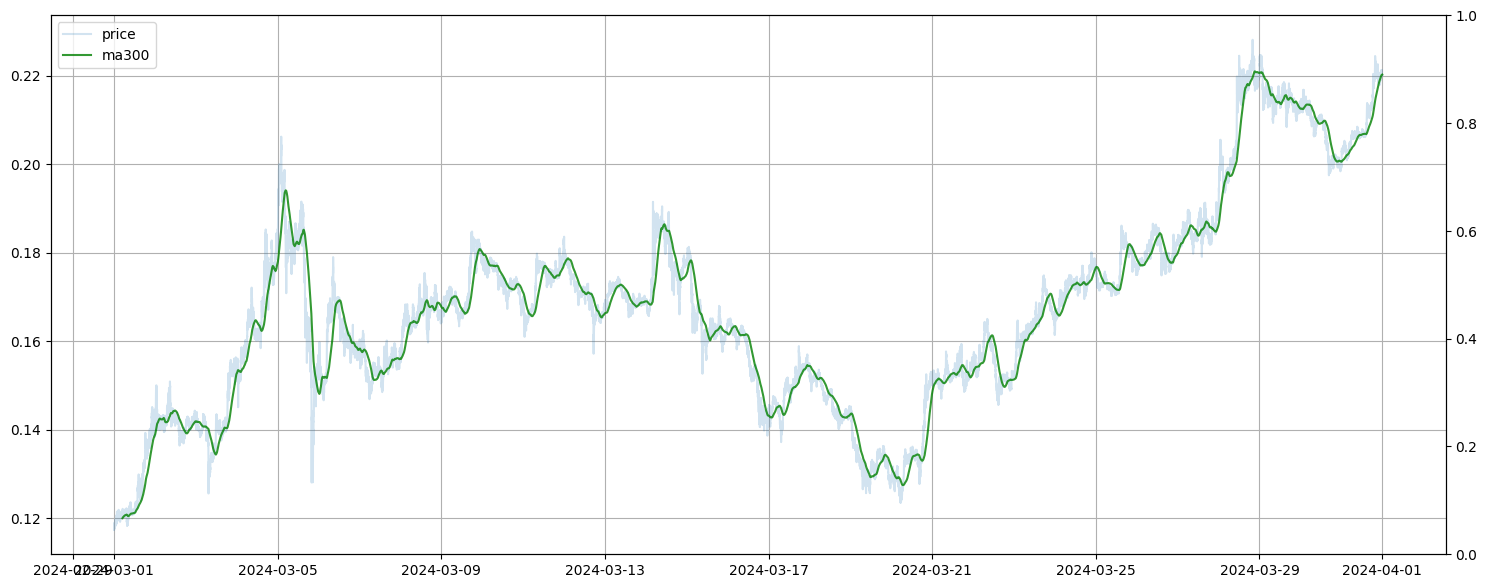

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# read data
data = pd.read_csv('data/DOGEUSDT-1m-2024-03.csv')
data['time'] = pd.to_datetime(data['open_time'], unit = 'ms')

fig, ax = plt.subplots(figsize = (18,7))
ax2 = ax.twinx()

# plot price(close) values
ax.plot(data['time'], data['close'], alpha = 0.2)
# plot MA(300) indicator
ax.plot(data['time'], data['close'].rolling(300).mean(), c = 'green', alpha = 0.8)
ax.grid(True)
ax.legend(['price', 'ma300'])


### 3) Using historical market data and copytrader trades try to reproduce strategy:
https://www.binance.com/en/copy-trading/lead-details/3838699803249970688

https://www.binance.com/en/copy-trading/lead-details/3871399360910422273

In [2]:
copytrader_1_trades = pd.read_csv('copytrader_data/trades_3838699803249970688.csv')
copytrader_2_trades = pd.read_csv('copytrader_data/trades_3871399360910422273.csv')

copytrader_1_positions = pd.read_csv('copytrader_data/positions_3838699803249970688.csv')
copytrader_2_positions = pd.read_csv('copytrader_data/positions_3871399360910422273.csv')
copytrader_1_positions['time'] = pd.to_datetime(copytrader_1_positions['opened'], unit = 'ms')
copytrader_1_positions = copytrader_1_positions.sort_values('time').reset_index(drop=True)
copytrader_1_positions.head(10)

Unnamed: 0       id    symbol type         opened         closed   avgCost  \
0        1899  1155605  DOGEUSDT   UM  1701946005725  1701947621356  0.094014   
1        1898  1159663  DOGEUSDT   UM  1701948778280  1701952291740  0.094376   
2        1897  1164109  DOGEUSDT   UM  1701956987503  1701958279285  0.094260   
3        1896  1164561  DOGEUSDT   UM  1701958880205  1701959196467  0.094310   
4        1895  1171655  DOGEUSDT   UM  1701962781183  1701964883559  0.096497   
5        1894  1175079  DOGEUSDT   UM  1701966892395  1701966979164  0.097080   
6        1893  1220322  DOGEUSDT   UM  1702015514695  1702017323963  0.097691   
7        1892  1222614  DOGEUSDT   UM  1702018516436  1702020120215  0.097225   
8        1891  1223870  DOGEUSDT   UM  1702020566251  1702020941252  0.096460   
9        1890  1225212  DOGEUSDT   UM  1702021433351  1702022320705  0.097959   

   avgClosePrice  closingPnl  maxOpenInterest  closedVolume isolated   side  \
0        0.09442       0.609           1500.0        1500.0    Cross   Long   
1        0.09482       0.488           1100.0        1100.0    Cross   Long   
2        0.09462       0.180            500.0         500.0    Cross   Long   
3        0.09472       0.205            500.0         500.0    Cross   Long   
4        0.09608       0.501           1200.0        1200.0    Cross  Short   
5        0.09668       0.200            500.0         500.0    Cross  Short   
6        0.09728       0.699           1700.0        1700.0    Cross  Short   
7        0.09688       0.276            800.0         800.0    Cross  Short   
8        0.09682       0.180            500.0         500.0    Cross   Long   
9        0.09748       0.623           1300.0        1300.0    Cross  Short   

       status     updateTime                    time  
0  All Closed  1701947621531 2023-12-07 10:46:45.725  
1  All Closed  1701952291846 2023-12-07 11:32:58.280  
2  All Closed  1701958279433 2023-12-07 13:49:47.503  
3  All Closed  1701959196617 2023-12-07 14:21:20.205  
4  All Closed  1701964884135 2023-12-07 15:26:21.183  
5  All Closed  1701966979345 2023-12-07 16:34:52.395  
6  All Closed  1702017324104 2023-12-08 06:05:14.695  
7  All Closed  1702020120331 2023-12-08 06:55:16.436  
8  All Closed  1702020941404 2023-12-08 07:29:26.251  
9  All Closed  1702022320843 2023-12-08 07:43:53.351

In [3]:
# here you can try to guess how each bots traded and create your own strategy
# we give an example with demanded metrics on deals of first bot

# just like example
total_balace_on_account = 4000

#income in %
incomes = copytrader_1_positions.closingPnl/total_balace_on_account*100

In [4]:
import numpy as np

iterest_rate = 0
sharp_ratio = (incomes.mean() - iterest_rate)/incomes.std()
print('sharp ratio', round(sharp_ratio, 2))

print(f'win rates {round((incomes > 0).sum()/len(incomes) *100, 2)}%')
print(f'total profit {round(incomes.sum(), 3)}%')

sharp ratio 0.02
win rates 99.84%
total profit 23.296%


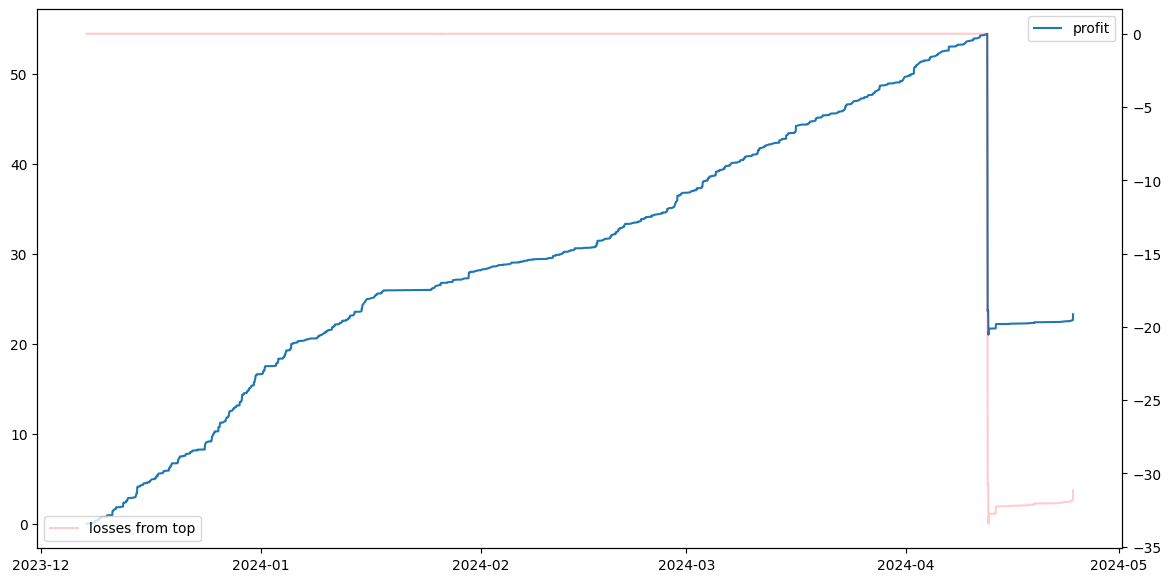

In [5]:
fig, ax = plt.subplots(figsize = (14,7))

#income profit
ax.plot(copytrader_1_positions['time'], incomes.cumsum())

#draw down
ax2 = ax.twinx()
ax2.plot(copytrader_1_positions['time'], incomes.cumsum() - pd.Series(incomes.cumsum()).cummax(), c = 'red', alpha = 0.2)

ax.legend(['profit'])
ax2.legend(['losses from top'])